In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [3]:
# Function to load and preprocess the dataset
def load_dataset(image_folder, img_size=(128, 128)):
    images = []
    labels = []

    for file in os.listdir(image_folder):
        img_path = os.path.join(image_folder, file)
        if file.endswith(('.png', '.jpg', '.jpeg')):  # Filter image files
            try:
                img = tf.keras.utils.load_img(img_path, target_size=img_size)
                img_array = tf.keras.utils.img_to_array(img)
                images.append(img_array)
                labels.append(0)  # Assuming all images belong to one class
            except Exception as e:
                print(f"Error loading {file}: {e}")

    images = np.array(images) / 255.0  # Normalize pixel values
    labels = np.array(labels)
    print(f"Loaded {len(images)} images.")
    return images, labels


In [4]:
# Load dataset
image_folder = "/content/drive/MyDrive/TECH405/image_dataset"
img_size = (128, 128)
X, y = load_dataset(image_folder, img_size)
print(f"Shape of X: {X.shape}, Shape of y: {y.shape}")

Loaded 500 images.
Shape of X: (500, 128, 128, 3), Shape of y: (500,)


In [5]:
# Split dataset
if X.shape[0] > 0 and y.shape[0] > 0:
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
    print(f"Training set size: {X_train.shape[0]}, Validation set size: {X_val.shape[0]}, Test set size: {X_test.shape[0]}")
else:
    raise ValueError("No data available to split.")

Training set size: 350, Validation set size: 75, Test set size: 75


In [6]:
# Build model function
def build_model(conv_layers=2, dense_units=128, activation='relu', pooling='max', input_shape=(128, 128, 3), num_classes=10):
    model = models.Sequential()
    model.add(layers.Input(shape=input_shape))

    # Add convolutional and pooling layers
    for _ in range(conv_layers):
        model.add(layers.Conv2D(32, (3, 3), activation=activation))
        model.add(layers.MaxPooling2D((2, 2)) if pooling == 'max' else layers.AveragePooling2D((2, 2)))

    # Flatten and add dense layers
    model.add(layers.Flatten())
    model.add(layers.Dense(dense_units, activation=activation))
    model.add(layers.Dense(num_classes, activation='softmax'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [7]:
# Train and validate model
class_names = ["class_0"]  # Define appropriate class names based on your dataset
model = build_model(conv_layers=3, dense_units=256, activation='relu', pooling='max', input_shape=img_size + (3,), num_classes=len(class_names))

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32, callbacks=[early_stopping])


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 557ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 534ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 13s 733ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 576ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 523ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 728ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00


In [8]:
# Evaluate model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

3/3 - 0s - 124ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Test Loss: 0.0000, Test Accuracy: 0.0000


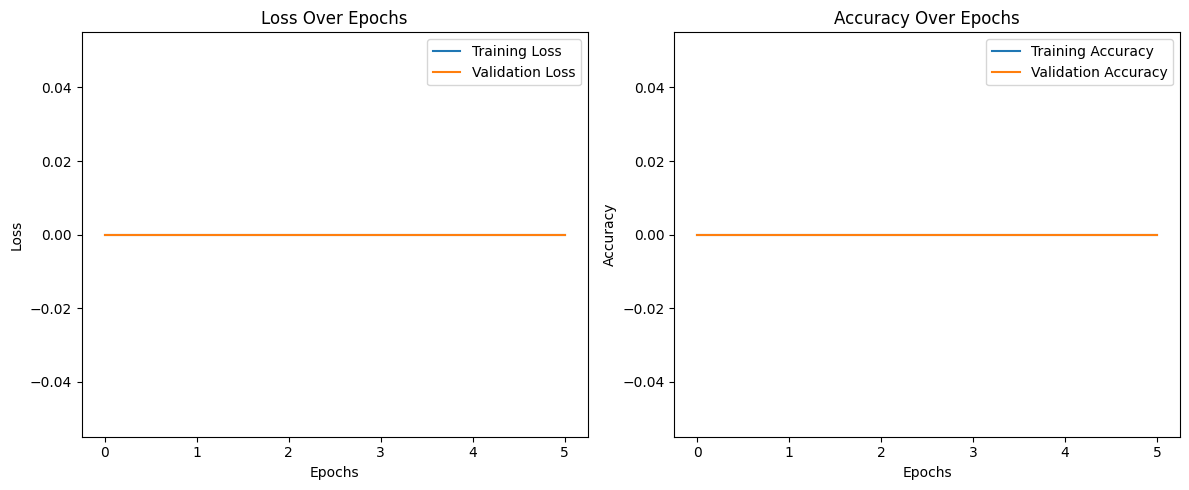

In [9]:
# Plot training history
def plot_history(history):
    plt.figure(figsize=(12, 5))

    # Loss plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Accuracy plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history(history)

In [10]:
# Save Model
model.save('image_classification_model.h5')
print("Model saved as 'image_classification_model.h5'")

Model saved as 'image_classification_model.h5'


/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


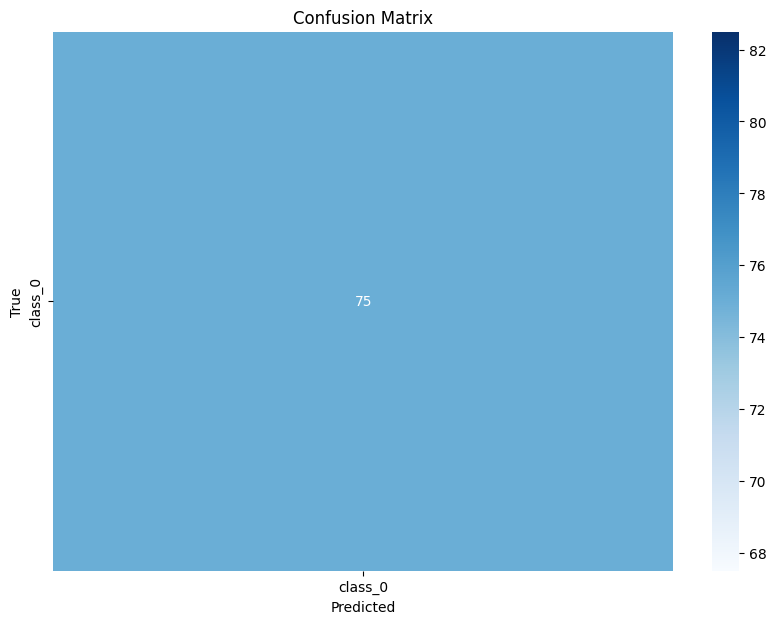

In [11]:
# Confusion matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 679ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 558ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 12s 828ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 577ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 556ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00


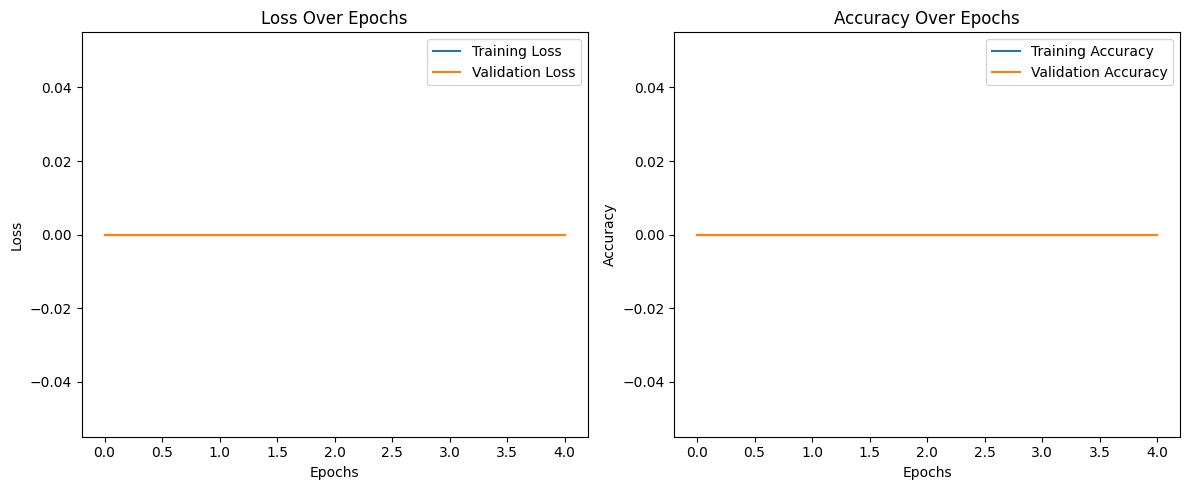

In [12]:
# Augmented training
datagen = ImageDataGenerator(rotation_range=30, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')
datagen.fit(X_train)

history_aug = model.fit(datagen.flow(X_train, y_train, batch_size=32), validation_data=(X_val, y_val), epochs=50, callbacks=[early_stopping])
plot_history(history_aug)

In [13]:
# Evaluate Model on Test Set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)

# Print the Test Loss and Accuracy
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")


3/3 - 0s - 120ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Test Loss: 0.0000, Test Accuracy: 0.0000


In [14]:
# Create an ImageDataGenerator with augmentation
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Fit the generator to the training data
datagen.fit(X_train)

# Train the model with augmented data
history_aug = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=50,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping]
)


Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 757ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 587ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 635ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 12s 907ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 24s 821ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00


In [15]:
from sklearn.metrics import classification_report

# Generate predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate classification report
report = classification_report(y_test, y_pred_classes, target_names=class_names)

# Print classification report
print("Classification Report:")
print(report)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 216ms/step
Classification Report:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        75

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75

